In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('sc-metadata.csv', low_memory=False)

In [3]:
df.head()

,Nuclei_Location_Center_X,Nuclei_Location_Center_Y,Key,Target,Compound,Split,Image_Name
0,934.180157,17.906457,SQ00015218/A01/1,461,DMSO,Training,SQ00015218/A01/1/461@934.180157480315x17.90645...
1,541.930436,30.440808,SQ00015218/A01/1,461,DMSO,Training,SQ00015218/A01/1/461@541.930436337625x30.44080...
2,506.318201,31.689786,SQ00015218/A01/1,461,DMSO,Training,SQ00015218/A01/1/461@506.31820092476x31.689785...
3,167.794123,37.808581,SQ00015218/A01/1,461,DMSO,Training,SQ00015218/A01/1/461@167.79412316935802x37.808...
4,293.495264,38.634902,SQ00015218/A01/1,461,DMSO,Training,SQ00015218/A01/1/461@293.495264064294x38.63490...


In [23]:
pd.DataFrame(df.Compound.unique().tolist()).to_csv('compounds_1007.csv')

In [5]:
meta = pd.read_csv('/Users/mbornhol/git/neural-profiling/00_thesis/baseline/meta.csv')
df = pd.merge(df, meta, how='left', left_on = ["Compound"], right_on=['Metadata_broad_sample'])

In [6]:
df.Metadata_moa.value_counts()

adrenergic receptor antagonist       154101
cyclooxygenase inhibitor             140008
phosphodiesterase inhibitor          136889
adrenergic receptor agonist          116031
acetylcholine receptor antagonist    106377
                                      ...  
protein synthesis inhibitor            1424
HSP inhibitor                          1290
ATPase inhibitor                        849
JAK inhibitor                           817
proteasome inhibitor                    325
Name: Metadata_moa, Length: 194, dtype: int64

In [ ]:
index = pd.read_csv('826_index.csv')
index['Key'] = sub['Metadata_Plate'] + "/" + sub['Metadata_Well'] + "/" + sub['Metadata_Site'].astype(str)

In [17]:
len(index.Key.unique())

75024

In [18]:
len(df.Key.unique())

23117

In [40]:
df = pd.merge(df.drop(columns=['Split']), index[['Key', 'Split']], how='left', on='Key', validate='many_to_one')

sc = pd.merge(sc, sub, how='left', on='Key', validate='one_to_one')

In [41]:
df.head()

,Nuclei_Location_Center_X,Nuclei_Location_Center_Y,Key,Target,Compound,Image_Name,Split
0,934.180157,17.906457,SQ00015218/A01/1,461,DMSO,SQ00015218/A01/1/461@934.180157480315x17.90645...,Unused
1,541.930436,30.440808,SQ00015218/A01/1,461,DMSO,SQ00015218/A01/1/461@541.930436337625x30.44080...,Unused
2,506.318201,31.689786,SQ00015218/A01/1,461,DMSO,SQ00015218/A01/1/461@506.31820092476x31.689785...,Unused
3,167.794123,37.808581,SQ00015218/A01/1,461,DMSO,SQ00015218/A01/1/461@167.79412316935802x37.808...,Unused
4,293.495264,38.634902,SQ00015218/A01/1,461,DMSO,SQ00015218/A01/1/461@293.495264064294x38.63490...,Unused


# important!
length of sc 1007: 456533

Length of sc 1025:  911,042

Length of sc 1026:  2,267,640

--
full thing : 18,239,862

sc_1017: 534,166. All compounds

sc_1027: 578,103 all compounds. Basically like 926 with only batches 3-5

sc_1028: 1 mil all compounds. Basically like 1027 with more cells

1.538888888888889

In [84]:
df['Split'] = "Unused"

In [85]:
compounds = df.Compound.unique()
for c in compounds:
    df.loc[df[df.Compound == c].sample(frac=0.1).index, 'Split'] = 'Training'
    df.loc[df[(df.Compound == c) & (df.Split == "Unused")].sample(frac=0.01).index, 'Split'] = 'Validation'

df.loc[df[(df.Compound == "DMSO") & (df.Split == "Training")].sample(frac=0.9).index, 'Split'] = 'Unused'
df.loc[df[(df.Compound == "DMSO") & (df.Split == "Validation")].sample(frac=0.9).index, 'Split'] = 'Unused'

df.loc[df[(df.Compound == "DMSO") & (df.Split == "Validation")].sample(frac=0.9).index, 'Split'] = 'Unused'

In [ ]:
# For sc_1025
compounds = df.Compound.unique()
for c in compounds:
    df.loc[df[df.Compound == c].sample(frac=0.5).index, 'Split'] = 'Training'
    df.loc[df[(df.Compound == c) & (df.Split == "Unused")].sample(frac=0.025).index, 'Split'] = 'Validation'

In [ ]:
import pandas as pd
index = pd.read_csv('/local_group_storage/broad_data/michael/training/inputs/metadata/826_index.csv', low_memory=False)
index['Key'] = index['Metadata_Plate'] + "/" + index['Metadata_Well'] + "/" + index['Metadata_Site'].astype(str)
sub = index[["Key", "Split"]]
# df = pd.read_csv('1017_sc/sc-metadata.csv', low_memory=False)
df = pd.read_csv('sc_1017.csv', low_memory=False)
df = pd.merge(df, sub, how='left', on='Key', validate='many_to_one')

df.loc[df[(df['Split_x'] == "Training")].sample(frac=0.9).index, 'Split_x'] = 'Unused'
df.loc[df[(df.Split_y != 'Training') & (df.Split_x == "Training")].index, 'Split_x'] = 'Unused'

df.loc[df[(df.Compound == "DMSO") & (df.Split_x == "Training")].sample(frac=0.95).index, 'Split_x'] = 'Unused'
df.loc[df[(df.Compound == "DMSO") & (df.Split_x == "Validation")].sample(frac=0.95).index, 'Split_x'] = 'Unused'
df.loc[df[(df.Split_y == "Training")].sample(frac=0.01).index, 'Split_x'] = 'Validation'

#add more
df.loc[df[(df.Split_y == 'Training') & (df.Split_x == "Unused") & (df.Compound != "DMSO")].sample(frac=0.05).index, 'Split_x'] = 'Training'

In [7]:
ls = df[df['Split_x'] == 'Training'].Compound.value_counts()
ls = ls[ls < 100].index.tolist()
for c in ls:
    df.loc[df[(df.Split_y == 'Training') & (df.Compound == c)].sample(frac=0.5).index, 'Split_x'] = 'Training'

<bound method Series.keys of BRD-K92428232-001-10-6    985
BRD-K86797399-001-04-4    974
BRD-K33127281-001-05-6    883
BRD-K89561498-001-01-7    873
BRD-K87737963-001-06-0    817
BRD-K69776681-001-03-8    777
BRD-K83837640-001-04-8    746
BRD-A94756469-001-04-7    546
BRD-K78659596-001-03-9    325
BRD-K95412502-003-01-5    303
BRD-K99475619-001-01-2    279
Name: Compound, dtype: int64>

In [9]:
df[df['Split'] == 'Training'].Compound.value_counts()
df[df['Split_x'] == 'Training'].Compound.value_counts()

['BRD-K92428232-001-10-6',
 'BRD-K86797399-001-04-4',
 'BRD-K33127281-001-05-6',
 'BRD-K89561498-001-01-7',
 'BRD-K87737963-001-06-0',
 'BRD-K69776681-001-03-8',
 'BRD-K83837640-001-04-8',
 'BRD-A94756469-001-04-7',
 'BRD-K78659596-001-03-9',
 'BRD-K95412502-003-01-5',
 'BRD-K99475619-001-01-2']

In [87]:
df[df['Split'] == 'Validation'].Compound.value_counts()

DMSO                      449
BRD-K80082640-001-01-0    140
BRD-K85833139-001-01-9    139
BRD-K76022557-003-02-7    138
BRD-K81694556-003-01-9    138
                         ... 
BRD-K69776681-001-03-8      7
BRD-A94756469-001-04-7      5
BRD-K78659596-001-03-9      3
BRD-K99475619-001-01-2      3
BRD-K95412502-003-01-5      3
Name: Compound, Length: 462, dtype: int64

In [88]:
df[df['Split'] == 'Unused'].Compound.value_counts()

DMSO                      493072
BRD-K80082640-001-01-0     13823
BRD-K85833139-001-01-9     13747
BRD-A94276798-001-01-4     13663
BRD-K75844781-003-08-0     13630
                           ...  
BRD-K83837640-001-04-8       664
BRD-A94756469-001-04-7       486
BRD-K78659596-001-03-9       290
BRD-K95412502-003-01-5       270
BRD-K99475619-001-01-2       248
Name: Compound, Length: 462, dtype: int64

In [89]:
df.to_csv('index_1016.csv', index=False)

In [ ]:
# Creating 1027 sc

sc.loc[sc[sc['Split'] == "Training"].sample(frac=0.8).index, 'Split'] = 'Unused'
sc.loc[sc[(sc.Compound == c) & (sc.Split == "Unused")].sample(frac=0.01).index, 'Split'] = 'Validation'

for c in ls:
    sc.loc[df[(df.Compound == c) & (sc.Split_y == "Training")].sample(frac=0.01).index, 'Split_x'] = 'Validation'


In [ ]:
df.loc[(df.Metadata_Site == 5) & (df.Split == 'Unused'),'Split']='Test'

In [ ]:
test_plates = df[df['Split'] == 'Unused'].Metadata_Plate.unique()
df.loc[(df.Compound == 'DMSO') & (df.Metadata_Plate.isin(test_plates)),'Split']='Unused'
df.loc[(df.Compound == 'DMSO') & (df.Split == 'Unused') & (df.Treatment_Replicate % 599 == 0),'Split']='Test'


In [42]:
df[df['Split'] == 'Test'].Compound.value_counts()

DMSO                      1826
BRD-K82467063-001-02-7     866
BRD-A86871940-001-01-9     824
BRD-K85679373-001-01-1     820
BRD-K81694556-003-01-9     786
                          ... 
BRD-K78659596-001-03-9      18
BRD-K83837640-001-04-8      16
BRD-K86797399-001-04-4      14
BRD-K99475619-001-01-2       2
BRD-K95412502-003-01-5       1
Name: Compound, Length: 461, dtype: int64

In [43]:
df[df['Split'] == 'Training'].Compound.value_counts()

DMSO                      325445
BRD-K80082640-001-01-0      9346
BRD-K76022557-003-02-7      9133
BRD-K75844781-003-08-0      9039
BRD-K81694556-003-01-9      9012
                           ...  
BRD-K83837640-001-04-8       414
BRD-A94756469-001-04-7       357
BRD-K95412502-003-01-5       203
BRD-K78659596-001-03-9       184
BRD-K99475619-001-01-2       179
Name: Compound, Length: 462, dtype: int64

In [44]:
df[df['Split'] == 'Unused'].Compound.value_counts()

DMSO                      171235
BRD-A86216746-046-02-6      5965
BRD-K45924332-001-16-8      5911
BRD-A94276798-001-01-4      5777
BRD-K85833139-001-01-9      5754
                           ...  
BRD-K26325692-003-01-3       256
BRD-A94756469-001-04-7       189
BRD-K78659596-001-03-9       123
BRD-K95412502-003-01-5        99
BRD-K99475619-001-01-2        98
Name: Compound, Length: 462, dtype: int64

In [49]:
df[df['Split'] == 'Unused'].shape

(1810269, 7)

In [ ]:
df.to_csv('826_index.csv', index=False)

In [ ]:
# select top 50 moas
vc = df.Metadata_moa.value_counts()
large_moas = vc[:50].keys().tolist()
df = df[df["Metadata_moa"].isin(large_moas)]

In [4]:
# delete all Compounds that do not have 5 replicates
full_reps = df[df.Treatment_Replicate == 5].Compound.unique()
df = df[df["Compound"].isin(full_reps)]

In [5]:

df['Split'] = 'Training'
# df.loc[(df.Treatment_Replicate == 1) & (df.Metadata_Site == 1),'Split']='Test'

In [6]:
df.loc[(df.Treatment_Replicate == 1) | (df.Treatment_Replicate == 2),'Split']='Test'

In [7]:
test_plates = df[df['Split'] == 'Test'].Metadata_Plate.unique()

In [8]:
df.loc[(df.Compound == 'DMSO') & (df.Metadata_Plate.isin(test_plates)),'Split']='Test'

In [9]:
df[df['Split'] == 'Training'].Compound.value_counts()

DMSO                      18144
BRD-K86301799-001-34-8       27
BRD-A29485665-001-12-8       27
BRD-K22749967-046-02-3       27
BRD-A97674275-001-11-8       27
                          ...  
BRD-K33127281-001-05-6       27
BRD-K89348303-001-14-7       27
BRD-K70610771-001-02-9       27
BRD-K80608265-001-01-6       27
BRD-K11433652-001-17-0       26
Name: Compound, Length: 512, dtype: int64

In [10]:
print(len(df[df['Split'] == 'Test'].Metadata_Plate.unique()))
print(len(df[df['Split'] == 'Training'].Metadata_Plate.unique()))

df[df['Split'] == 'Test'].Compound.value_counts()

52
84


DMSO                      11124
BRD-K86301799-001-34-8       18
BRD-K06388322-312-02-6       18
BRD-K90825648-001-02-0       18
BRD-A65013509-003-24-4       18
                          ...  
BRD-K92984783-003-05-7       18
BRD-K08799216-001-05-3       18
BRD-K05524748-003-04-4       18
BRD-K31627533-001-09-5       18
BRD-K81258678-001-01-0       11
Name: Compound, Length: 512, dtype: int64

In [11]:
df[df['Split'] == 'Test'].shape

(20315, 20)

In [113]:
# save
df.to_csv('811_index.csv', index=False)


In [18]:
# now with less validation files!
df['Split'] = 'Training'
df.loc[(df.Treatment_Replicate == 1) | (df.Treatment_Replicate == 2),'Split']='Unused'
test_plates = df[df['Split'] == 'Unused'].Metadata_Plate.unique()
df.loc[(df.Compound == 'DMSO') & (df.Metadata_Plate.isin(test_plates)),'Split']='Unused'

In [13]:
df.loc[(df.Compound == 'DMSO') & (df.Split == 'Unused') & (df.Treatment_Replicate % 199 == 0),'Split']='Test'
df.loc[(df.Split == 'Unused') & (df.Treatment_Replicate == 1) & (df.Metadata_Site <= 2),'Split']='Test'

In [14]:
df[df['Split'] == 'Test'].Compound.value_counts()

DMSO                      92
BRD-K86301799-001-34-8     2
BRD-K67080878-001-15-4     2
BRD-A32172948-001-07-6     2
BRD-A52660433-066-02-1     2
                          ..
BRD-K97688263-001-03-7     2
BRD-K45158365-001-11-4     2
BRD-K06388322-312-02-6     2
BRD-K81144366-003-19-7     2
BRD-K24616672-003-20-1     2
Name: Compound, Length: 512, dtype: int64

In [15]:
df[df['Split'] == 'Training'].Compound.value_counts()

DMSO                      18144
BRD-K86301799-001-34-8       27
BRD-A29485665-001-12-8       27
BRD-K22749967-046-02-3       27
BRD-A97674275-001-11-8       27
                          ...  
BRD-K33127281-001-05-6       27
BRD-K89348303-001-14-7       27
BRD-K70610771-001-02-9       27
BRD-K80608265-001-01-6       27
BRD-K11433652-001-17-0       26
Name: Compound, Length: 512, dtype: int64

In [16]:
df[df['Split'] == 'Unused'].Compound.value_counts()

DMSO                      11032
BRD-K86301799-001-34-8       16
BRD-K06388322-312-02-6       16
BRD-K90825648-001-02-0       16
BRD-A65013509-003-24-4       16
                          ...  
BRD-K92984783-003-05-7       16
BRD-K08799216-001-05-3       16
BRD-K05524748-003-04-4       16
BRD-K31627533-001-09-5       16
BRD-K81258678-001-01-0        9
Name: Compound, Length: 512, dtype: int64

In [130]:
df.to_csv('812_index.csv', index=False)

Now, we are gonna check that we have mixed batches within the compounds so we dont train the batches!

In [21]:
# Get Batch data
batch = pd.read_csv('/Users/mbornhol/git/neural-profiling/baseline/01_data/level_3_data/sub_level3.csv')

/Users/mbornhol/miniconda3/envs/cyto_eval/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (8,9,16,17,18,20,21,22,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
b = batch[['Metadata_Batch_Number', 'Metadata_Plate', 'Metadata_Well']]

In [29]:
df = pd.merge(df, b, on=['Metadata_Plate', 'Metadata_Well'], validate='many_to_one')

In [30]:
df['Split'] = 'Training'
df.loc[(df.Treatment_Replicate == 1) | (df.Treatment_Replicate == 2),'Split']='Unused'
test_plates = df[df['Split'] == 'Unused'].Metadata_Plate.unique()
df.loc[(df.Compound == 'DMSO') & (df.Metadata_Plate.isin(test_plates)),'Split']='Unused'
df.loc[(df.Compound == 'DMSO') & (df.Split == 'Unused') & (df.Treatment_Replicate % 199 == 0),'Split']='Test'
df.loc[(df.Split == 'Unused') & (df.Treatment_Replicate == 1) & (df.Metadata_Site <= 2),'Split']='Test'

In [74]:
ls = {}
for c in df.Metadata_broad_sample.unique():
    v = df[(df['Metadata_broad_sample'] == c)].Metadata_Batch_Number.value_counts().idxmax()
    w = df[(df['Metadata_broad_sample'] == c) & (df['Metadata_Batch_Number'] == v)].Treatment_Replicate.unique()[:2]
    ls[c] = [v,w]

In [94]:
df['Split'] = 'Training'

In [103]:
for m in ls:
    df.loc[(df.Metadata_broad_sample == m) & (df.Treatment_Replicate.isin(ls[m][1])),'Split']='Unused'
df.loc[(df.Metadata_Site == 5) & (df.Split == 'Unused'),'Split']='Test'

In [93]:
test_plates = df[df['Split'] == 'Unused'].Metadata_Plate.unique()
df.loc[(df.Compound == 'DMSO') & (df.Metadata_Plate.isin(test_plates)),'Split']='Unused'
df.loc[(df.Compound == 'DMSO') & (df.Split == 'Unused') & (df.Treatment_Replicate % 399 == 0),'Split']='Test'

,Metadata_Plate,Metadata_Well,Metadata_Site,Metadata_broad_sample,Metadata_moa,Metadata_mmoles_per_liter,Metadata_dose_recode,RNA,ER,AGP,...,DNA,Concentration,Treatment_ID,Compound,pert_iname,Treatment_Replicate,Treatment,Plate_Map_Name,Split,Metadata_Batch_Number
34976,SQ00015056,C13,1,BRD-K92984783-003-05-7,dopamine receptor antagonist|serotonin recepto...,10.0,6,SQ00015056/r03c13f01p01-ch3sk1fk1fl1.png,SQ00015056/r03c13f01p01-ch2sk1fk1fl1.png,SQ00015056/r03c13f01p01-ch4sk1fk1fl1.png,...,SQ00015056/r03c13f01p01-ch1sk1fk1fl1.png,10.0,9124,BRD-K92984783-003-05-7,melperone,1,BRD-K92984783-003-05-7@9.99999999999999999,C-7161-01-LM6-028,Unused,4
34977,SQ00015056,C13,2,BRD-K92984783-003-05-7,dopamine receptor antagonist|serotonin recepto...,10.0,6,SQ00015056/r03c13f02p01-ch3sk1fk1fl1.png,SQ00015056/r03c13f02p01-ch2sk1fk1fl1.png,SQ00015056/r03c13f02p01-ch4sk1fk1fl1.png,...,SQ00015056/r03c13f02p01-ch1sk1fk1fl1.png,10.0,9124,BRD-K92984783-003-05-7,melperone,1,BRD-K92984783-003-05-7@9.99999999999999999,C-7161-01-LM6-028,Unused,4
34978,SQ00015056,C13,3,BRD-K92984783-003-05-7,dopamine receptor antagonist|serotonin recepto...,10.0,6,SQ00015056/r03c13f03p01-ch3sk1fk1fl1.png,SQ00015056/r03c13f03p01-ch2sk1fk1fl1.png,SQ00015056/r03c13f03p01-ch4sk1fk1fl1.png,...,SQ00015056/r03c13f03p01-ch1sk1fk1fl1.png,10.0,9124,BRD-K92984783-003-05-7,melperone,1,BRD-K92984783-003-05-7@9.99999999999999999,C-7161-01-LM6-028,Unused,4
34979,SQ00015056,C13,4,BRD-K92984783-003-05-7,dopamine receptor antagonist|serotonin recepto...,10.0,6,SQ00015056/r03c13f04p01-ch3sk1fk1fl1.png,SQ00015056/r03c13f04p01-ch2sk1fk1fl1.png,SQ00015056/r03c13f04p01-ch4sk1fk1fl1.png,...,SQ00015056/r03c13f04p01-ch1sk1fk1fl1.png,10.0,9124,BRD-K92984783-003-05-7,melperone,1,BRD-K92984783-003-05-7@9.99999999999999999,C-7161-01-LM6-028,Unused,4
34980,SQ00015056,C13,5,BRD-K92984783-003-05-7,dopamine receptor antagonist|serotonin recepto...,10.0,6,SQ00015056/r03c13f05p01-ch3sk1fk1fl1.png,SQ00015056/r03c13f05p01-ch2sk1fk1fl1.png,SQ00015056/r03c13f05p01-ch4sk1fk1fl1.png,...,SQ00015056/r03c13f05p01-ch1sk1fk1fl1.png,10.0,9124,BRD-K92984783-003-05-7,melperone,1,BRD-K92984783-003-05-7@9.99999999999999999,C-7161-01-LM6-028,Unused,4
34981,SQ00015056,C13,6,BRD-K92984783-003-05-7,dopamine receptor antagonist|serotonin recepto...,10.0,6,SQ00015056/r03c13f06p01-ch3sk1fk1fl1.png,SQ00015056/r03c13f06p01-ch2sk1fk1fl1.png,SQ00015056/r03c13f06p01-ch4sk1fk1fl1.png,...,SQ00015056/r03c13f06p01-ch1sk1fk1fl1.png,10.0,9124,BRD-K92984783-003-05-7,melperone,1,BRD-K92984783-003-05-7@9.99999999999999999,C-7161-01-LM6-028,Unused,4
34982,SQ00015056,C13,7,BRD-K92984783-003-05-7,dopamine receptor antagonist|serotonin recepto...,10.0,6,SQ00015056/r03c13f07p01-ch3sk1fk1fl1.png,SQ00015056/r03c13f07p01-ch2sk1fk1fl1.png,SQ00015056/r03c13f07p01-ch4sk1fk1fl1.png,...,SQ00015056/r03c13f07p01-ch1sk1fk1fl1.png,10.0,9124,BRD-K92984783-003-05-7,melperone,1,BRD-K92984783-003-05-7@9.99999999999999999,C-7161-01-LM6-028,Unused,4
34983,SQ00015056,C13,8,BRD-K92984783-003-05-7,dopamine receptor antagonist|serotonin recepto...,10.0,6,SQ00015056/r03c13f08p01-ch3sk1fk1fl1.png,SQ00015056/r03c13f08p01-ch2sk1fk1fl1.png,SQ00015056/r03c13f08p01-ch4sk1fk1fl1.png,...,SQ00015056/r03c13f08p01-ch1sk1fk1fl1.png,10.0,9124,BRD-K92984783-003-05-7,melperone,1,BRD-K92984783-003-05-7@9.99999999999999999,C-7161-01-LM6-028,Unused,4
34984,SQ00015056,C13,9,BRD-K92984783-003-05-7,dopamine receptor antagonist|serotonin recepto...,10.0,6,SQ00015056/r03c13f09p01-ch3sk1fk1fl1.png,SQ00015056/r03c13f09p01-ch2sk1fk1fl1.png,SQ00015056/r03c13f09p01-ch4sk1fk1fl1.png,...,SQ00015056/r03c13f09p01-ch1sk1fk1fl1.png,10.0,9124,BRD-K92984783-003-05-7,melperone,1,BRD-K92984783-003-05-7@9.99999999999999999,C-7161-01-LM6-028,Unused,4
34985,SQ00015057,C13,1,BRD-K92984783-003-05-7,dopamine receptor antagonist|serotonin recepto...,10.0,6,SQ00015057/r03c13f01p01-ch3sk1fk1fl1.png,SQ00015057/r03c13f01p01-ch2sk1fk1fl1.png,SQ00015057/r03c13f01p01-ch4sk1fk1fl1.png,...,SQ00015057/r03c13f01p01-ch1sk1f

In [112]:
df[df['Split'] == 'Test'].Compound.value_counts()

DMSO                      45
BRD-K86301799-001-34-8     2
BRD-K67080878-001-15-4     2
BRD-A32172948-001-07-6     2
BRD-A52660433-066-02-1     2
                          ..
BRD-K97688263-001-03-7     2
BRD-K45158365-001-11-4     2
BRD-K06388322-312-02-6     2
BRD-K24616672-003-20-1     2
BRD-K81258678-001-01-0     1
Name: Compound, Length: 512, dtype: int64

In [113]:
df[df['Split'] == 'Training'].Compound.value_counts()

DMSO                      17928
BRD-K86301799-001-34-8       27
BRD-A29485665-001-12-8       27
BRD-K22749967-046-02-3       27
BRD-A97674275-001-11-8       27
                          ...  
BRD-K33127281-001-05-6       27
BRD-K89348303-001-14-7       27
BRD-K70610771-001-02-9       27
BRD-K80608265-001-01-6       27
BRD-K11433652-001-17-0       26
Name: Compound, Length: 512, dtype: int64

In [114]:
df[df['Split'] == 'Unused'].Compound.value_counts()


DMSO                      11295
BRD-K86301799-001-34-8       16
BRD-K06388322-312-02-6       16
BRD-K90825648-001-02-0       16
BRD-A65013509-003-24-4       16
                          ...  
BRD-K92984783-003-05-7       16
BRD-K08799216-001-05-3       16
BRD-K05524748-003-04-4       16
BRD-K31627533-001-09-5       16
BRD-K81258678-001-01-0       10
Name: Compound, Length: 512, dtype: int64

In [115]:
# this shows that all training includes the two batches.
for c in df.Metadata_broad_sample.unique():
    v = df[(df['Metadata_broad_sample'] == c) & (df.Split == 'Training')].Metadata_Batch_Number.unique()
    if len(v) != 2:
        print(c)

DMSO


In [116]:
df.to_csv('817_index.csv', index=False)

In [1]:
# new index with smaller moas instead of bigger ones.


In [31]:
df = pd.read_csv('sub_index.csv')
# select bottom 50 moas
vc = df.Metadata_moa.value_counts()
large_moas = vc[50:].keys().tolist()
large_moas.append('unknown')
df = df[df["Metadata_moa"].isin(large_moas)]

In [32]:
# delete all Compounds that do not have 5 replicates
full_reps = df[df.Treatment_Replicate == 5].Compound.unique()
df = df[df["Compound"].isin(full_reps)]

In [33]:
df['Split'] = 'Training'

In [34]:
# Get Batch data
batch = pd.read_csv('/Users/mbornhol/git/neural-profiling/baseline/01_data/level_3_data/sub_level3.csv')
b = batch[['Metadata_Batch_Number', 'Metadata_Plate', 'Metadata_Well']]
df = pd.merge(df, b, on=['Metadata_Plate', 'Metadata_Well'], validate='many_to_one')

/Users/mbornhol/miniconda3/envs/cyto_eval/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (8,9,16,17,18,20,21,22,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [35]:
ls = {}
for c in df.Metadata_broad_sample.unique():
    v = df[(df['Metadata_broad_sample'] == c)].Metadata_Batch_Number.value_counts().idxmax()
    w = df[(df['Metadata_broad_sample'] == c) & (df['Metadata_Batch_Number'] == v)].Treatment_Replicate.unique()[:2]
    ls[c] = [v,w]

In [36]:
for m in ls:
    df.loc[(df.Metadata_broad_sample == m) & (df.Treatment_Replicate.isin(ls[m][1])),'Split']='Unused'
df.loc[(df.Metadata_Site == 5) & (df.Split == 'Unused'),'Split']='Test'

In [37]:
test_plates = df[df['Split'] == 'Unused'].Metadata_Plate.unique()
df.loc[(df.Compound == 'DMSO') & (df.Metadata_Plate.isin(test_plates)),'Split']='Unused'
df.loc[(df.Compound == 'DMSO') & (df.Split == 'Unused') & (df.Treatment_Replicate % 399 == 0),'Split']='Test'


In [38]:

df[df['Split'] == 'Test'].Compound.value_counts()

DMSO                      45
BRD-K26341917-001-01-3     2
BRD-K81916719-001-13-9     2
BRD-A48430263-003-17-2     2
BRD-K88544581-001-06-1     2
                          ..
BRD-K97729603-001-01-2     2
BRD-K81694556-003-01-9     2
BRD-K33882852-003-02-8     2
BRD-K07857022-002-01-1     2
BRD-K20897876-001-10-0     2
Name: Compound, Length: 507, dtype: int64

In [39]:
df[df['Split'] == 'Training'].Compound.value_counts()

DMSO                      17928
BRD-K69776681-001-03-8       27
BRD-K89402695-001-02-3       27
BRD-A61793559-001-15-6       27
BRD-K81916719-001-13-9       27
                          ...  
BRD-A30984645-001-01-5       27
BRD-A29623586-001-01-3       27
BRD-K08586861-001-01-1       27
BRD-K70358946-001-15-7       27
BRD-A29520968-001-02-7       27
Name: Compound, Length: 507, dtype: int64

In [40]:
df[df['Split'] == 'Unused'].Compound.value_counts()

DMSO                      11295
BRD-K26341917-001-01-3       16
BRD-K25361343-001-01-6       16
BRD-K13356952-001-25-1       16
BRD-K51747290-001-13-1       16
                          ...  
BRD-K55781385-001-01-7       16
BRD-A12230535-001-06-7       16
BRD-K50398167-236-22-7       16
BRD-A26384407-001-25-1       16
BRD-K18157228-001-01-7       15
Name: Compound, Length: 507, dtype: int64

In [41]:
df.to_csv('823_index.csv', index=False)

----------

In [3]:

# And heres the next one! Now I am gonna use allllll of them!
df = pd.read_csv('sub_index.csv')

In [4]:
# delete all Compounds that do not have 5 replicates
full_reps = df[df.Treatment_Replicate == 5].Compound.unique()
df = df[df["Compound"].isin(full_reps)]

In [5]:
df['Split'] = 'Training'

In [6]:
# Get Batch data
batch = pd.read_csv('/Users/mbornhol/git/neural-profiling/baseline/01_data/level_3_data/sub_level3.csv')
b = batch[['Metadata_Batch_Number', 'Metadata_Plate', 'Metadata_Well']]
df = pd.merge(df, b, on=['Metadata_Plate', 'Metadata_Well'], validate='many_to_one')

/Users/mbornhol/miniconda3/envs/cyto_eval/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (8,9,16,17,18,20,21,22,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
ls = {}
for c in df.Metadata_broad_sample.unique():
    v = df[(df['Metadata_broad_sample'] == c)].Metadata_Batch_Number.value_counts().idxmax()
    w = df[(df['Metadata_broad_sample'] == c) & (df['Metadata_Batch_Number'] == v)].Treatment_Replicate.unique()[:2]
    ls[c] = [v,w]

In [8]:
for m in ls:
    df.loc[(df.Metadata_broad_sample == m) & (df.Treatment_Replicate.isin(ls[m][1])),'Split']='Unused'

In [9]:
df.loc[(df.Metadata_Site == 5) & (df.Split == 'Unused'),'Split']='Test'

In [11]:
test_plates = df[df['Split'] == 'Unused'].Metadata_Plate.unique()
df.loc[(df.Compound == 'DMSO') & (df.Metadata_Plate.isin(test_plates)),'Split']='Unused'
df.loc[(df.Compound == 'DMSO') & (df.Split == 'Unused') & (df.Treatment_Replicate % 599 == 0),'Split']='Test'


In [12]:

df[df['Split'] == 'Test'].Compound.value_counts()

DMSO                      36
BRD-A65280694-003-13-7     2
BRD-K53765467-001-02-1     2
BRD-K53061490-003-13-9     2
BRD-K72922393-003-15-2     2
                          ..
BRD-A20126139-001-04-2     2
BRD-K72414522-001-06-7     2
BRD-A50764878-003-02-8     2
BRD-K86882815-001-03-2     2
BRD-K81258678-001-01-0     1
Name: Compound, Length: 1018, dtype: int64

In [13]:
df[df['Split'] == 'Training'].Compound.value_counts()

DMSO                      17928
BRD-A65280694-003-13-7       27
BRD-K76617868-003-11-9       27
BRD-K34008116-001-01-7       27
BRD-K62200014-003-10-5       27
                          ...  
BRD-A73368467-003-17-6       27
BRD-K82603084-408-01-1       27
BRD-K96862998-001-15-5       27
BRD-K60341624-001-02-2       27
BRD-K11433652-001-17-0       26
Name: Compound, Length: 1018, dtype: int64

In [14]:
df[df['Split'] == 'Unused'].Compound.value_counts()

DMSO                      11304
BRD-K91825936-001-01-2       16
BRD-K61693562-300-01-7       16
BRD-K78659596-001-03-9       16
BRD-K68693535-001-03-4       16
                          ...  
BRD-K06557128-001-07-0       16
BRD-K22024824-001-03-7       16
BRD-K19352500-070-12-4       16
BRD-K18157228-001-01-7       15
BRD-K81258678-001-01-0       10
Name: Compound, Length: 1018, dtype: int64

In [16]:
df.to_csv('826_index.csv', index=False)

,Metadata_Plate,Metadata_Well,Metadata_Site,Metadata_broad_sample,Metadata_moa,Metadata_mmoles_per_liter,Metadata_dose_recode,RNA,ER,AGP,...,DNA,Concentration,Treatment_ID,Compound,pert_iname,Treatment_Replicate,Treatment,Plate_Map_Name,Split,Metadata_Batch_Number
67153,SQ00015142,P07,5,BRD-A65280694-003-13-7,dopamine receptor antagonist,10.0,6,SQ00015142/r16c07f05p01-ch3sk1fk1fl1.png,SQ00015142/r16c07f05p01-ch2sk1fk1fl1.png,SQ00015142/r16c07f05p01-ch4sk1fk1fl1.png,...,SQ00015142/r16c07f05p01-ch1sk1fk1fl1.png,10.0,5698,BRD-A65280694-003-13-7,molindone,1,BRD-A65280694-003-13-7@9.99999999999999999,C-7161-01-LM6-017,Test,5
67162,SQ00015143,P07,5,BRD-A65280694-003-13-7,dopamine receptor antagonist,10.0,6,SQ00015143/r16c07f05p01-ch3sk1fk1fl1.png,SQ00015143/r16c07f05p01-ch2sk1fk1fl1.png,SQ00015143/r16c07f05p01-ch4sk1fk1fl1.png,...,SQ00015143/r16c07f05p01-ch1sk1fk1fl1.png,10.0,5698,BRD-A65280694-003-13-7,molindone,2,BRD-A65280694-003-13-7@9.99999999999999999,C-7161-01-LM6-017,Test,5


In [6]:
len(df.Plate_Map_Name.unique())

28

In [7]:
28 * 5

140

Record the number of cells in test and train!



In [6]:
count = pd.read_csv('/Users/mbornhol/git/neural-profiling/baseline/results/cell_count.csv')
df812 = pd.read_csv('812_index.csv')
df817 = pd.read_csv('817_index.csv')
df826 = pd.read_csv('826_index.csv')




In [7]:
df812 = df812[df812['Split'] == 'Training'].drop_duplicates(['Metadata_Plate', 'Metadata_Well'])
df812 = pd.merge(df812, count, on=['Metadata_Plate', 'Metadata_Well'])

In [8]:
df812['cell_count'].sum()


7594539

In [9]:
7594539 / 1457935


5.2091067160058575

Try and find the phenotype list of Wells.

In [94]:
from pycytominer import aggregate, annotate, normalize, feature_select, cyto_utils
from sklearn.decomposition import PCA

In [95]:
df = pd.read_csv('/Users/mbornhol/git/neural-profiling/pre-trained/efficient_net/aggregated/aggregated_efficientnet_median.csv', low_memory=False)
meta = pd.read_csv('/Users/mbornhol/git/neural-profiling/pre-trained/data-prep/02_index_preperation/repurposing_info_external_moa_map_resolved.tsv', sep='\t')
meta = meta[['broad_sample', 'moa']]
meta.rename(columns = {'broad_sample' : 'Metadata_broad_sample', 'moa' : 'Metadata_moa'}, inplace=True)
features = [f for f in df.columns if f.startswith('eff')]

In [96]:
con = aggregate(
    df,
    strata=["Metadata_broad_sample"],
    features=features
)
con = pd.merge(con, meta, how='left', on=['Metadata_broad_sample'])


In [97]:
dmso = con.loc[1143]
con.loc[1143]

Metadata_broad_sample        DMSO
efficientnet_0          -0.170743
efficientnet_1          -0.147162
efficientnet_2          -0.156323
efficientnet_3           0.003327
                           ...   
efficientnet_6396       -0.036225
efficientnet_6397       -0.153883
efficientnet_6398       -0.070627
efficientnet_6399        0.653679
Metadata_moa                  NaN
Name: 1143, Length: 6402, dtype: object

In [98]:
for i in range(len(con)):
    con.loc[i, 'distance_dmso'] = np.linalg.norm(dmso[features] - con.loc[i, features])
sort = con.sort_values(['distance_dmso'], ascending=False)

(array([ 69., 504., 197., 145.,  70.,  28.,  43.,  41.,  33.,  14.]),
 array([ 0.        ,  2.0335457 ,  4.0670914 ,  6.10063711,  8.13418281,
        10.16772851, 12.20127421, 14.23481991, 16.26836561, 18.30191132,
        20.33545702]),
 <BarContainer object of 10 artists>)

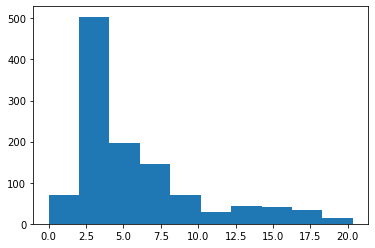

In [106]:
plt.style.use({'figure.facecolor':'white'})
plt.hist(sort.distance_dmso.values.tolist())

In [132]:
s = 4.5
sum([1 for i in sort.distance_dmso.values.tolist() if i > s])

502

In [133]:
select = sort[sort['distance_dmso'] > s].Metadata_broad_sample.tolist()

Explained variation per principal component: [0.61588871 0.15303335]


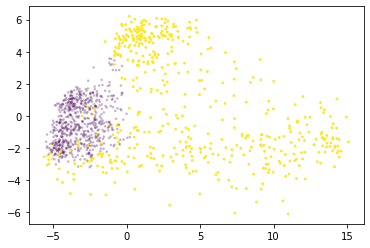

In [134]:
def func(row):
    if select.count(row.Metadata_broad_sample) == 1:
        return 1
    else:
        return 0.2

pca = PCA(n_components=2)
pca_result = pca.fit_transform(con[features].values)
con['pca-one'] = pca_result[:,0]
con['pca-two'] = pca_result[:,1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
plt.style.use({'figure.facecolor':'white'})
con['color'] = con.apply(func, axis=1)
plt.scatter(con['pca-one'], con['pca-two'], s = 3, alpha= con['color'], c = con['color'])
plt.show()

In [135]:
con[con['Metadata_broad_sample'].isin(select)].Metadata_moa.value_counts()

glucocorticoid receptor agonist                                                                                                15
topoisomerase inhibitor                                                                                                        15
phosphodiesterase inhibitor                                                                                                    12
HDAC inhibitor                                                                                                                 11
EGFR inhibitor                                                                                                                 11
                                                                                                                               ..
purinergic receptor antagonist                                                                                                  1
estrogen receptor agonist|glucocorticoid receptor antagonist|progesterone receptor agonist

In [136]:
df = pd.read_csv('sub_index.csv')

In [137]:
# delete all Compounds that do not have 5 replicates
full_reps = df[df.Treatment_Replicate == 5].Compound.unique()
df = df[df["Compound"].isin(full_reps)]
df['Split'] = 'Training'

In [138]:
select.append('DMSO')
df = df[df["Compound"].isin(select)]

In [139]:
# Get Batch data
batch = pd.read_csv('/Users/mbornhol/git/neural-profiling/baseline/01_data/level_3_data/sub_level3.csv')
b = batch[['Metadata_Batch_Number', 'Metadata_Plate', 'Metadata_Well']]
df = pd.merge(df, b, on=['Metadata_Plate', 'Metadata_Well'], validate='many_to_one')
ls = {}
for c in df.Metadata_broad_sample.unique():
    v = df[(df['Metadata_broad_sample'] == c)].Metadata_Batch_Number.value_counts().idxmax()
    w = df[(df['Metadata_broad_sample'] == c) & (df['Metadata_Batch_Number'] == v)].Treatment_Replicate.unique()[:2]
    ls[c] = [v,w]

/Users/mbornhol/miniconda3/envs/cyto_eval/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (8,9,16,17,18,20,21,22,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [140]:
for m in ls:
    df.loc[(df.Metadata_broad_sample == m) & (df.Treatment_Replicate.isin(ls[m][1])),'Split']='Unused'

In [141]:
df.loc[(df.Metadata_Site == 5) & (df.Split == 'Unused'),'Split']='Test'

In [142]:
test_plates = df[df['Split'] == 'Unused'].Metadata_Plate.unique()
df.loc[(df.Compound == 'DMSO') & (df.Metadata_Plate.isin(test_plates)),'Split']='Unused'
df.loc[(df.Compound == 'DMSO') & (df.Split == 'Unused') & (df.Treatment_Replicate % 599 == 0),'Split']='Test'


In [143]:

df[df['Split'] == 'Test'].Compound.value_counts()

DMSO                      36
BRD-K33882852-003-02-8     2
BRD-A05523972-001-01-5     2
BRD-K16803204-001-01-6     2
BRD-K52959329-238-01-9     2
                          ..
BRD-K88807631-001-01-3     2
BRD-A51964809-003-12-6     2
BRD-K62996583-001-10-3     2
BRD-K12737986-001-01-4     2
BRD-K81258678-001-01-0     1
Name: Compound, Length: 432, dtype: int64

In [144]:
df[df['Split'] == 'Training'].Compound.value_counts()

DMSO                      17928
BRD-K33882852-003-02-8       27
BRD-K08547377-394-03-5       27
BRD-K52911425-001-09-8       27
BRD-K27182532-001-02-3       27
                          ...  
BRD-K36270037-001-01-7       27
BRD-A34255068-001-34-5       27
BRD-K45924332-001-16-8       27
BRD-A49765801-001-04-1       27
BRD-K12737986-001-01-4       27
Name: Compound, Length: 432, dtype: int64

In [145]:
df[df['Split'] == 'Unused'].Compound.value_counts()

DMSO                      11304
BRD-K33882852-003-02-8       16
BRD-K88807631-001-01-3       16
BRD-K50133271-001-18-7       16
BRD-A23067620-300-01-3       16
                          ...  
BRD-A05821830-341-01-5       16
BRD-A93424738-001-04-8       16
BRD-K23499943-003-01-6       16
BRD-K18157228-001-01-7       15
BRD-K81258678-001-01-0       10
Name: Compound, Length: 432, dtype: int64

In [146]:
df.to_csv('924_index.csv', index=False)

In [148]:
df.shape

(48655, 21)